In [157]:
from statsbombpy import sb
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
import math
tqdm.pandas() # tqdm pandas mode
import warnings
warnings.filterwarnings('ignore', category=sb.api_client.NoAuthWarning)

In [158]:
seasons = {
    'Premier League': ['2015/2016'],
    # 'La Liga': ['2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021'],
    '1. Bundesliga': ['2015/2016'],
    'Serie A': ['2015/2016'],
    'Ligue 1': ['2015/2016'],
}

In [159]:
# competitions_df = sb.competitions()
# selection = pd.Series([False] * len(competitions_df))
# for competition_name, season in seasons.items():
#     selection |= (competitions_df['competition_name'] == competition_name) & competitions_df['season_name'].isin(season)
# competitions_df = competitions_df[selection]
# competitions_df

In [160]:
# for index, row in competitions_df.iterrows():
#     to_save = sb.matches(competition_id=row['competition_id'], season_id=row['season_id'])
#     file_path = f'dataset/intersection/statsbomb_matches_shots/matches_{row["competition_name"]}_{row["season_id"]}.csv'
#     to_save.to_csv(file_path, index=False)
#     print(f'Looking at {row["competition_name"]} {row["season_name"]}')
#     file_path = f'dataset/intersection/statsbomb_matches_shots/shots_{row["competition_name"]}_{row["season_id"]}.csv'
#     if os.path.exists(file_path):
#         continue
#     shots_dfs = []
#     for match_id in tqdm(to_save['match_id']):
#         shots_dfs.append(sb.events(match_id=match_id, split=True)['shots'])
#     pd.concat(shots_dfs).reset_index(drop=True).to_csv(file_path, index=False)

TypeError: 'Text' object is not callable

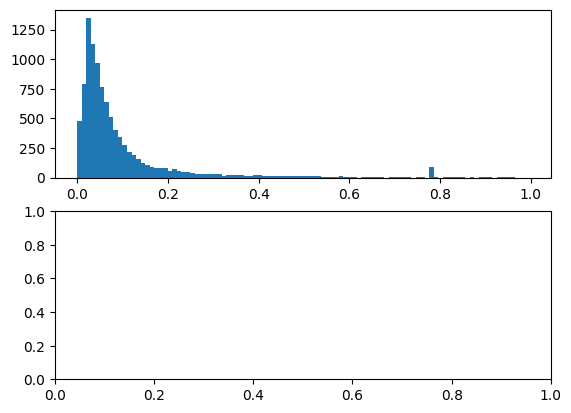

In [162]:
# Get understat formatting for competition names
def statsbomb_to_understat_competition_name(comp_name):
        if comp_name == 'Premier League':
            return 'epl'
        elif comp_name == '1. Bundesliga':
            return 'bundesliga'
        return competition_name.replace(' ', '_').lower()
# # Get match shots of season statsbomb, understat pairs
# def get_season_shots_statsbomb_understat(comp_name, season_name):
#     statsbomb_competitions = sb.competitions()
#     statsbomb_season_id = statsbomb_competitions[(statsbomb_competitions['competition_name'] == comp_name) & (statsbomb_competitions['season_name'] == season_name)]['season_id'].values[0]
#     statsbomb_matches_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/matches_{comp_name}_{statsbomb_season_id}.csv')
#     statsbomb_shots_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/shots_{comp_name}_{statsbomb_season_id}.csv')
#     split_season_name = season_name.split('/')
#     understat_season_name = split_season_name[0][2:] + '-' + split_season_name[1][2:]
#     understat_competition_name = statsbomb_to_understat_competition_name(comp_name)
#     understat_file_path = f'dataset/intersection/understat_matches_shots/shots_{understat_competition_name}_{understat_season_name}.csv'
#     understat_df = pd.read_csv(understat_file_path)
#     season_matches = []
#     for index, row in statsbomb_matches_df.iterrows():
#         match_date = row['match_date']
#         understat_date = match_date
#         def statsbomb_team_to_understat_team(teamname):
#             split_name = teamname.split(' ')
#             if split_name[0] == 'FC' or split_name[0] == 'AFC':
#                 return split_name[1]
#             else:
#                 return split_name[0]
#         understat_home_team = statsbomb_team_to_understat_team(row['home_team'])    
#         curr_understat_df = understat_df[(understat_df['date'].str.contains(understat_date)) & (understat_df['h_team'].str.contains(understat_home_team)) | (understat_df['a_team'].str.contains(understat_home_team))].copy()
#         curr_statsbomb_df = statsbomb_shots_df[statsbomb_shots_df['match_id'] == row['match_id']].copy()
#         if len(curr_understat_df) == 0:
#             print(understat_home_team, understat_date)
#         season_matches.append((curr_statsbomb_df, curr_understat_df))
#     return season_matches

all_statsbomb = []
all_understat = []
for competition_name, season_list in seasons.items():
    for season_name in season_list:
        statsbomb_competitions = sb.competitions()
        statsbomb_season_id = statsbomb_competitions[(statsbomb_competitions['competition_name'] == competition_name) & (statsbomb_competitions['season_name'] == season_name)]['season_id'].values[0]
        statsbomb_season_shots_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/shots_{competition_name}_{statsbomb_season_id}.csv')
        split_season_name = season_name.split('/')
        understat_season_name = split_season_name[0][2:] + '-' + split_season_name[1][2:]
        understat_season_shots_df = pd.read_csv(f'dataset/intersection/understat_matches_shots/shots_{statsbomb_to_understat_competition_name(competition_name)}_{understat_season_name}.csv')
        all_statsbomb.append(statsbomb_season_shots_df)
        all_understat.append(understat_season_shots_df)
        fig, axs = plt.subplots(2, 1)
        axs[0].hist(statsbomb_season_shots_df['shot_statsbomb_xg'], bins=math.ceil(math.sqrt(len(statsbomb_season_shots_df))))
        axs[0].set_title(f'{competition_name} {season_name} Statsbomb\n{len(statsbomb_season_shots_df)} shots')
        # axs[0].xlabel('xG')
        # axs[0].ylabel('Number of Shots')
        axs[1].hist(understat_season_shots_df['xG'], bins=math.ceil(math.sqrt(len(understat_season_shots_df))))
        # axs[1].xlabel('xG')
        # axs[1].ylabel('Number of Shots')
        axs[1].set_title(f'{competition_name} {season_name} Understat\n{len(understat_season_shots_df)} shots')
        fig.suptitle(f'{competition_name} {season_name} xG Distribution')
        fig.savefig(f'graphs/{competition_name}_{season_name.replace("/", "-")}_xg_distribution.png')
        plt.clf()
statsbomb_shots_df = pd.concat(all_statsbomb).reset_index(drop=True)
understat_shots_df = pd.concat(all_understat).reset_index(drop=True)
fig, (ax1, ax2) = plt.subplots(2)
axs[0].hist(statsbomb_shots_df['shot_statsbomb_xg'], bins=math.ceil(math.sqrt(len(statsbomb_season_shots_df))))
axs[0].set_title(f'Statsbomb\n{len(statsbomb_season_shots_df)} shots')
# axs[0].xlabel('xG')
# axs[0].ylabel('Number of Shots')
axs[1].hist(understat_shots_df['xG'], bins=math.ceil(math.sqrt(len(understat_season_shots_df))))
# axs[1].xlabel('xG')
# axs[1].ylabel('Number of Shots')
axs[1].set_title(f'Understat\n{len(understat_season_shots_df)} shots')
fig.suptitle(f'xG Distribution of the Dataproviders')
fig.savefig(f'graphs/xg_distribution.png')
plt.clf()